# TP2 Interpolation Numérique 
<img src="tp2an.png">

## Exercice 1

On considère le programme MATLAB suivant :
``` octave
function u=prog(x,y,c)
S = y; 
n = length(x); 
for j=1:n
    L = c-x; 
    for k=1:n
        if (k == j)
           L(k) = 1;
        else
           L(k) = L(k)/(x(j) - x(k));
        end 
    end 
    S(j) = S(j)*prod(L); 
end 
u=sum(S); 
```

## Version Python

In [1]:
from numpy import prod
def prog(x,y,c):
    S = [] 
    n = len(x)
    
    for j in range(n):
        L =[c-xx for xx in x]
        for k in range(n):
            if (k == j):                
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])   
        S.append(y[j]*prod(L))
        
    return  sum(S)

In [2]:

X=[1 ,2 ,3 ,4,-2];
Y=[-1, 0, 2 ,1,3];
for i in X:
    print(prog(X,Y,i))
sum(X)

-1.0
0.0
2.0
1.0
3.0


8

**Polynome d'interpolation de Lagrange** 
> Soient $(x_0,y_0), \ldots,(x_k,y_k),\ldots ,(x_n,k_n)$ $n+1$ points deux à deux distincts, le polynôme d'interpolation de Lagrange associés à ces points supports est défini par :
> $$P_n(x)=\sum_{k=0}^{n-1} y_kL_k(x)$$

avec $L_{0}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{n})}{(x_0-x_1)(x_0-x_2)\ldots(x_0-x_{n})}$ et $L_{k}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{k-1})(x-x_{k+1})\ldots(x_0-x_{n})}{(x_k-x_0)(x_k-x_1)\ldots(x_k-x_{k-1})(x_k-x_{k+1})\ldots(x_k-x_{n})}$ pour $k\in \{1,\ldots,n\}$

1) Que renvoie la fonction PR lorsqu'on lui déclare  **x=(x(1),x(2),...,x(n))x=(x(1),x(2),...,x(n))**  et  **y=(y(1),y(2),...,y(n))y=(y(1),y(2),...,y(n))**  deux vecteurs de même longueur  `n` et `c`  un nombre réel donné.

## Code Matlab/Octave

In [1]:
function u=PR(x,y,c)
S = y; 
n = length(x); 
for j=1:n
    L = c-x; 
    for k=1:n
        if (k == j)
           L(k) = 1;
        else
           L(k) = L(k)/(x(j) - x(k));
        end 
    end 
    S(j) = S(j)*prod(L); 
end 
u=sum(S);
end

In [5]:
X=[1 2 3 4];
Y=[-1 0 2 1];
for i=X
disp(u=PR(X,Y,i))
end

-1
0
 2
 1


2) Que contient le vecteur  LL  après la fin de la boucle  kk .

In [8]:
x=[1 2 3 4];
y=[-1 0 2 1];

In [14]:
S = y; 
n = length(x);
for c=X
for j=1:n
    L = c-x; 
    for k=1:n
        if (k == j)
           L(k) = 1;
        else
           L(k) = L(k)/(x(j) - x(k));
        end 
    end 
    S(j) = S(j)*prod(L); 
end 
u=sum(S);
end

In [15]:
L

L =

   1   1   1   1



3) Utiliser cette fonction pour dessiner le graph du polynôme de Lagrange  de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$.

f =

@(x) 1 ./ (1 + x .^ 2)



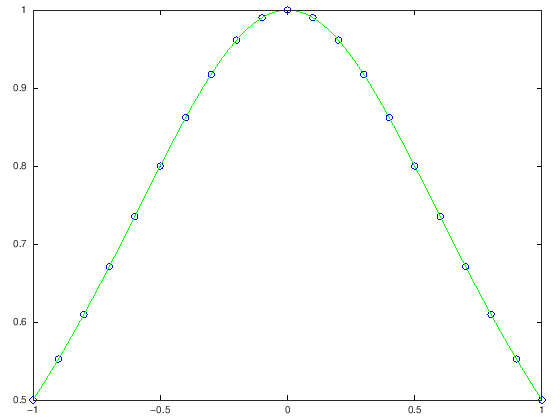

In [28]:
x=[-1:0.1:1];
f=@(x) 1./(1+x.^2)
y=f(x);

t=linspace(-1,1,100);
for u=1 : length(t)
pt(u)=PR(x,y,t(u));
end
plot(t,pt,'r',x,y,'bo',t,f(t),'g')

4) On considère la fonction $F$ suivante :
$$
F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad
h\in [0,2],
$$
et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.

4.1) Représenter sur un même graphe la fonction $F$ et $p_n$, où
 $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux
 points $x_0,\,\ldots,\,x_n$.

f =

@(x) pi - cos (x / 2) + x .* sqrt (1 - (x / 2) .^ 2)



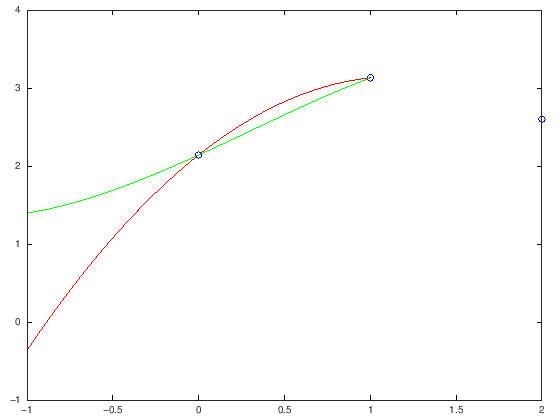

In [22]:
x=[0:2];
f=@(x) pi-cos(x/2)+x.*sqrt(1-(x/2).**2)
y=f(x);

for u=1 : length(t)
pn(u)=PR(x,y,t(u));
end
plot(t,pn,'r',x,y,'bo',t,f(t),'g')

2)Tracer la courbe d'erreur  (la
 fonction $F-p_n$). Qu'observer vous.

f =

@(x) pi - cos (x / 2) + x .* sqrt (1 - (x / 2) .^ 2)



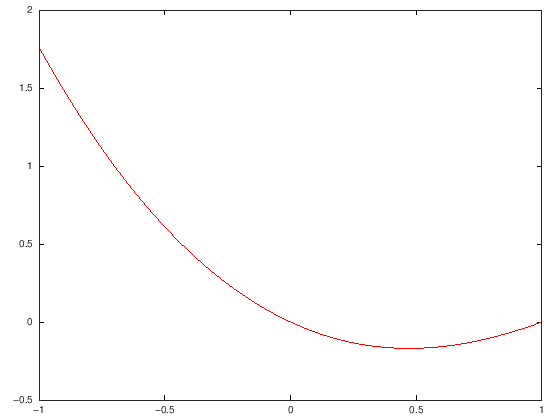

In [27]:
x=[0:2];
f=@(x) pi-cos(x/2)+x.*sqrt(1-(x/2).^2)
y=f(x);

for u=1 : length(t)
pn(u)=PR(x,y,t(u));
end
plot(t,f(t)-pn,'r')

## Exercice 2  ( Phenomène de Runge )

1) Vérifier que sur $[-5,5]$ le polynôme d'interpolation de Lagrange
  de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$,
en $N$ points uniformément espacés ne convergent pas correctement aux voisinages de $-1$ et $1$, pour $N=7,8,9,10 ...$

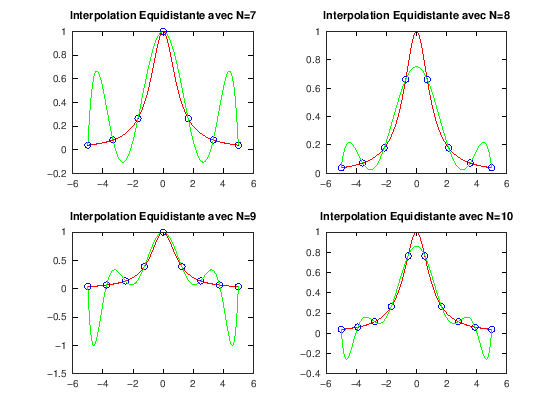

In [36]:
N=7;
X=linspace(-5,5,N);
f=@(x) 1./(1+x.^2);
Y=f(X);
p=polyfit(X,Y,N-1);
t=linspace(-5,5,1000);
subplot(2,2,1)
plot(t,f(t),'r',X,Y,'ob', t, polyval(p,t),'g')
title("Interpolation Equidistante avec N=7")
##############################
N=8;
X=linspace(-5,5,N);
f=@(x) 1./(1+x.^2);
Y=f(X);
p=polyfit(X,Y,N-1);
t=linspace(-5,5,1000);
subplot(2,2,2)
plot(t,f(t),'r',X,Y,'ob', t, polyval(p,t),'g')
title("Interpolation Equidistante avec N=8")
##############################
N=9;
X=linspace(-5,5,N);
f=@(x) 1./(1+x.^2);
Y=f(X);
p=polyfit(X,Y,N-1);
t=linspace(-5,5,1000);
subplot(2,2,3)
plot(t,f(t),'r',X,Y,'ob', t, polyval(p,t),'g')
title("Interpolation Equidistante avec N=9")
##############################
N=10;
X=linspace(-5,5,N);
f=@(x) 1./(1+x.^2);
Y=f(X);
p=polyfit(X,Y,N-1);
t=linspace(-5,5,1000);
subplot(2,2,4)
plot(t,f(t),'r',X,Y,'ob', t, polyval(p,t),'g')
title("Interpolation Equidistante avec N=10")

2) Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :
  $$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

  Vérifier que sur $[-5; 5]$ ; l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev
est meilleure qu'une  interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).

In [34]:
function V=tcheb(a,b,n)
V=[];
for k=[1:n]
V(k)=(a+b)/2+(a-b)/2*cos((k-1)/(n-1)*pi);
end 
end
V=tcheb(-5,5,11);

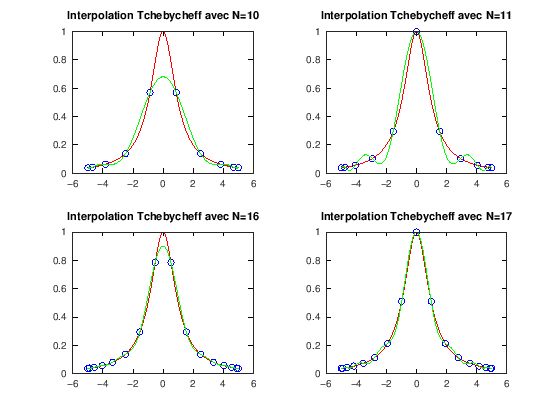

In [37]:
N=10;
f=@(x) 1./(1+x.^2);
Xt=tcheb(-5,5,N);
Yt=f(Xt);
pt=polyfit(Xt,Yt,N-1);
subplot(2,2,1)
plot(t,f(t),'r',Xt,Yt,'ob', t, polyval(pt,t),'g')
title("Interpolation Tchebycheff avec N=10")
##########################################
N=11;
f=@(x) 1./(1+x.^2);
Xt=tcheb(-5,5,N);
Yt=f(Xt);
pt=polyfit(Xt,Yt,N-1);
subplot(2,2,2)
plot(t,f(t),'r',Xt,Yt,'ob', t, polyval(pt,t),'g')
title("Interpolation Tchebycheff avec N=11")
##########################################
N=16;
f=@(x) 1./(1+x.^2);
Xt=tcheb(-5,5,N);
Yt=f(Xt);
pt=polyfit(Xt,Yt,N-1);
subplot(2,2,3)
plot(t,f(t),'r',Xt,Yt,'ob', t, polyval(pt,t),'g')
title("Interpolation Tchebycheff avec N=16")
##########################################
N=17;
f=@(x) 1./(1+x.^2);
Xt=tcheb(-5,5,N);
Yt=f(Xt);
pt=polyfit(Xt,Yt,N-1);
subplot(2,2,4)
plot(t,f(t),'r',Xt,Yt,'ob', t, polyval(pt,t),'g')
title("Interpolation Tchebycheff avec N=17")

## Exercice 3

On considère les deux programme MATLAB suivant :
``` octave
function f=intN(x,f)% RECURSIVE
m=length(x);
for k=2:m;
    f(k:m)=(f(k:m)-f(k-1:m-1))./(x(k:m)-x(1:m+1-k))
end
``` 
``` octave
function p=intNval(x,c,t)
m=length(x);
p=c(m)*ones(size(t));
for k=m-1:-1:1;
    p=p.*(t-x(k))+c(k);
end
```

1) Déterminer en utilisant les deux codes puis par un calcul à la main le polynôme de Newton pour les données suivantes :


<center>
<table>    
      $\begin{array}{|c|c|c|}
   \hline
   i & x_i  & y_i \\
   \hline
   0 &   -1  &   6 \\
   1 &   0 &  1 \\
   2 &  2  &  3 \\
   3 &  5  &  66 \\
   \hline
\end{array}$  
</table>
</center>

In [52]:
function f=intN(x,y)
m=length(x);
    for k=2:m
    f(k:m)=(y(k:m)-y(k-1:m-1))./(x(k:m)-x(1:m+1-k));
    end
end

In [54]:
x=[-1,0,2,5];
y=[6,1,3,66];
f=intN(x,y)

f =

    0.00000   -5.00000    0.66667   10.50000



In [58]:
function p=intNval(x,y,t)
m=length(x);
p=y(m)*ones(size(t));
for k=m-1:-1:1
    p=p.*(t-x(k))+y(k);
end
end

In [59]:
x=[-1,0,2,5];
y=[6,1,3,66];
t=[0,1,2,3];
f=intNval(x,y,t)

f =

     7  -118    27   838



In [ ]:
##Calcul a la main

2) Donner le Graph du polynôme trouvé en 1) dans l'intervalle $[-1;5]$.

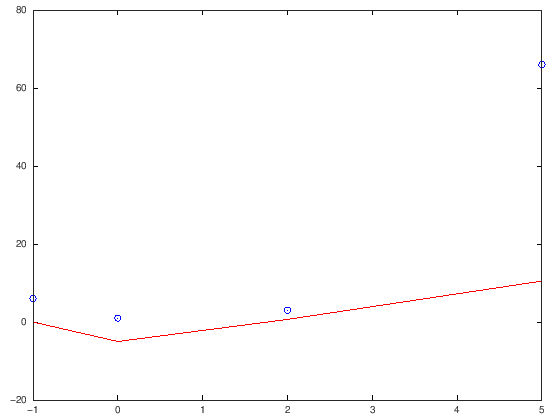

In [65]:
x=[-1,0,2,5];
y=[6,1,3,66];
f=intN(x,y);
plot(x,f,'r',x,y,'ob')

3) Calculer $P(1)$ en utilisant le polynôme trouvé en 1).

In [66]:
x=[-1,0,2,5];
y=[6,1,3,66];
t=[0,1,2,3];
p=intNval(x,y,t);
p(1)

ans =  7


4) Recalculer à la main et puis à l'aide du Programme neville la valeur de $P(1)$.